<a href="https://colab.research.google.com/github/Sadhana1842/Bharat-Intern/blob/main/CAT_vs_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/dogvscat/test/0/272.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/270.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/253.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/260.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/273.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/265.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/271.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/251.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/274.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/256.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/254.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/267.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/252.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/258.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/261.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/264.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/269.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/263.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/255.jpg
/kaggle/input/dog-vs-cat/dogvscat/test/0/257.jpg
/kaggle/input/dog-vs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense,Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
train_dir='/kaggle/input/dog-vs-cat/dogvscat/train'
test_dir='/kaggle/input/dog-vs-cat/dogvscat/test'

Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode="binary")
test_generator=train_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode="binary")

Creating a convolutional neural network

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

Training the model

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=20,validation_data=test_generator,validation_steps=test_generator.samples//20)

/tmp/ipykernel_32/4274908454.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=20,validation_data=test_generator,validation_steps=test_generator.samples//20)


Epoch 1/20
25/25 [==============================] - 12s 399ms/step - loss: 1.2117 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 10s 388ms/step - loss: 0.6979 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 10s 397ms/step - loss: 0.6963 - accuracy: 0.4820 - val_loss: 0.6925 - val_accuracy: 0.5250
Epoch 4/20
25/25 [==============================] - 10s 399ms/step - loss: 0.6979 - accuracy: 0.5120 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 5/20
25/25 [==============================] - 10s 393ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5250
Epoch 6/20
25/25 [==============================] - 10s 399ms/step - loss: 0.6958 - accuracy: 0.5140 - val_loss: 0.6896 - val_accuracy: 0.5250
Epoch 7/20
25/25 [==============================] - 10s 396ms/step - loss: 0.7039 - accuracy: 0.5700 - val_loss: 0.7013 - val_accuracy: 0.5000

Plotting the accuracy

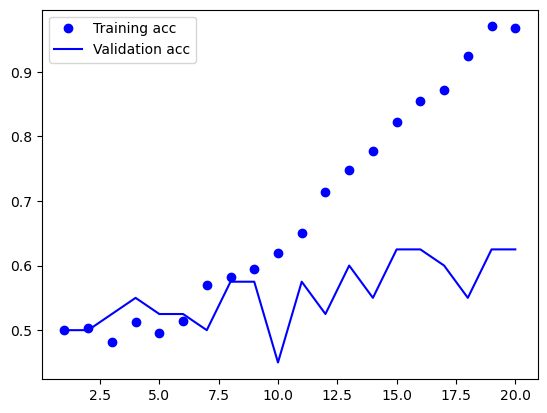

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

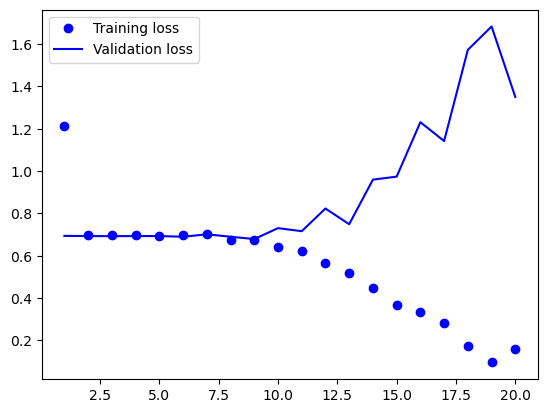

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [ ]:
model.save('catvsdog.h5')

Checking if our model works properly by giving an input of single image

In [ ]:

from tensorflow.keras.preprocessing import image
path ='../input/dog-vs-cat/dogvscat/train/0/109.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
import numpy as np
img_array = np.array(img)
img_array.shape

In [ ]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')